# 데이터사이언스융합학과 2024710658 박창준

# 주성분 분석

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [ ]:
# ! : !로 시작하면 파이썬 코드가 아닌 리눅스 셀 명령으로 이해함
# wget : 온라인 주소에서 데이터를 다운로드/저장
# -0 : 저장할 파일 이름을 지정
# .npy : 넘파이 배열의 기본 저장 포맷
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-04-19 16:12:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-04-19 16:12:02--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-04-19 16:12:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
 # numpy 불러오기
import numpy as np

# 다운받은 fruits_300.npy을 불러와 fruits라는 객체로 저장
fruits = np.load('fruits_300.npy')
# 3차원 배열을 2차원으로 변환
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
# PCA 불러오기
from sklearn.decomposition import PCA

# pca 객체 생성
# n_components=50 : 주성분 50개를 추출하겠다는 의미
pca = PCA(n_components=50)

# pca 학습
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# pca.components_.shape : 주성분의 형태 저장
print(pca.components_.shape)
# 주성분 개수, 특성 개수 출력

(50, 10000)


In [ ]:
# 시각화를 위한 matplotlib 불러오기
import matplotlib.pyplot as plt

# 함수 정의
# ratio=1 : 그림이 행과 열의 크기에 비례하게 커지도록 조정
def draw_fruits(arr, ratio=1):
    n = len(arr)

    # np.ceil() : 올림하여 가장 가까운 정수값으로 반환
    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

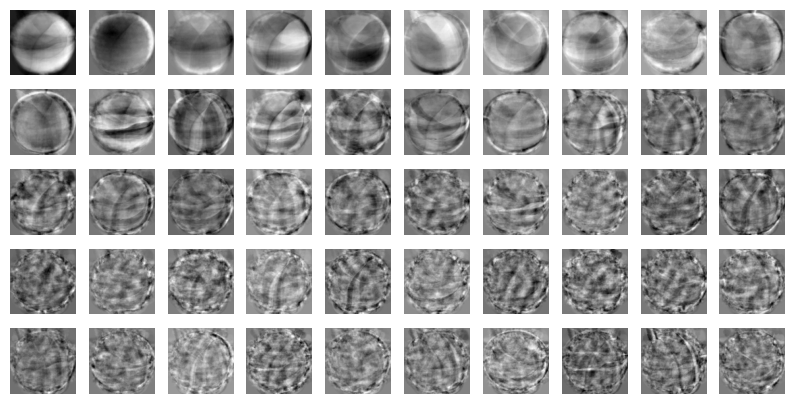

In [ ]:
# 주성분을 100 x 100크기의 이미지로 출력
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
# 원본 데이터의 형태 출력
print(fruits_2d.shape)
# 이미지 300장, 10000개의 특성

(300, 10000)


In [ ]:
# pca.transform() 적용해서 주성분을 50개로 축소
fruits_pca = pca.transform(fruits_2d)

In [ ]:
# 주성분 형태 출력
print(fruits_pca.shape)
# 원본데이터 300개, 주성분 50개

(300, 50)


## 원본 데이터 재구성

In [ ]:
# inverse_transform() : 차원축소된 데이터를 기반으로 원본데이터로 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
# 복원된 데이터의 형태를 출력
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
# 데이터를 100 x 100 형태로 변경
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

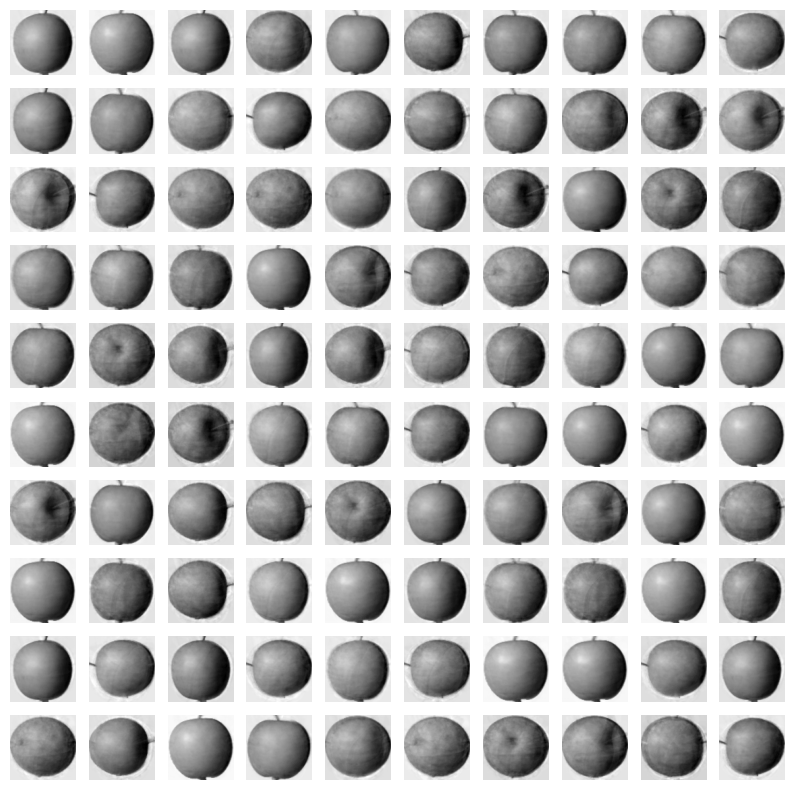

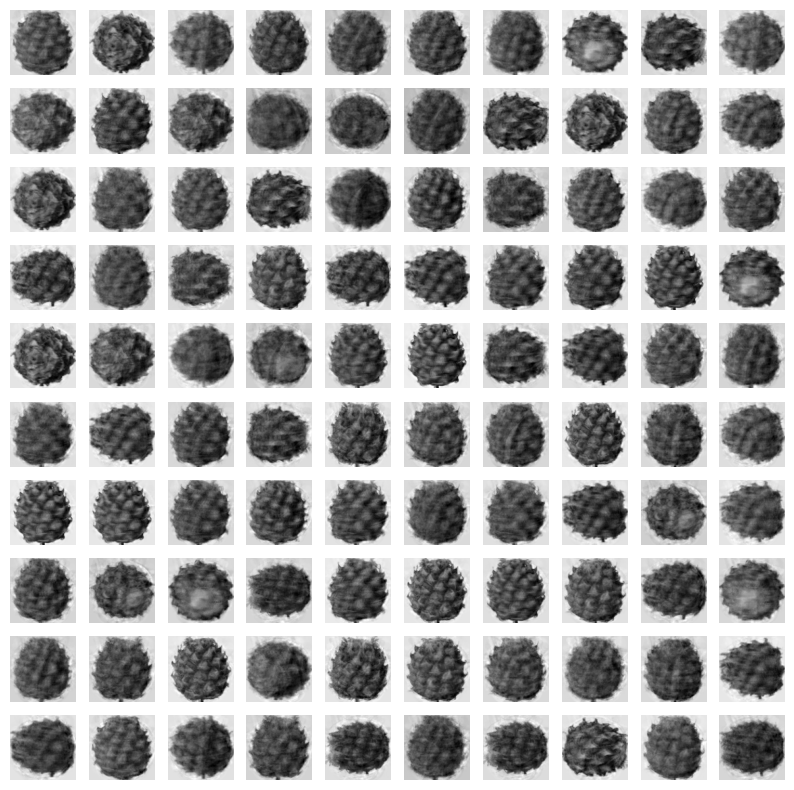

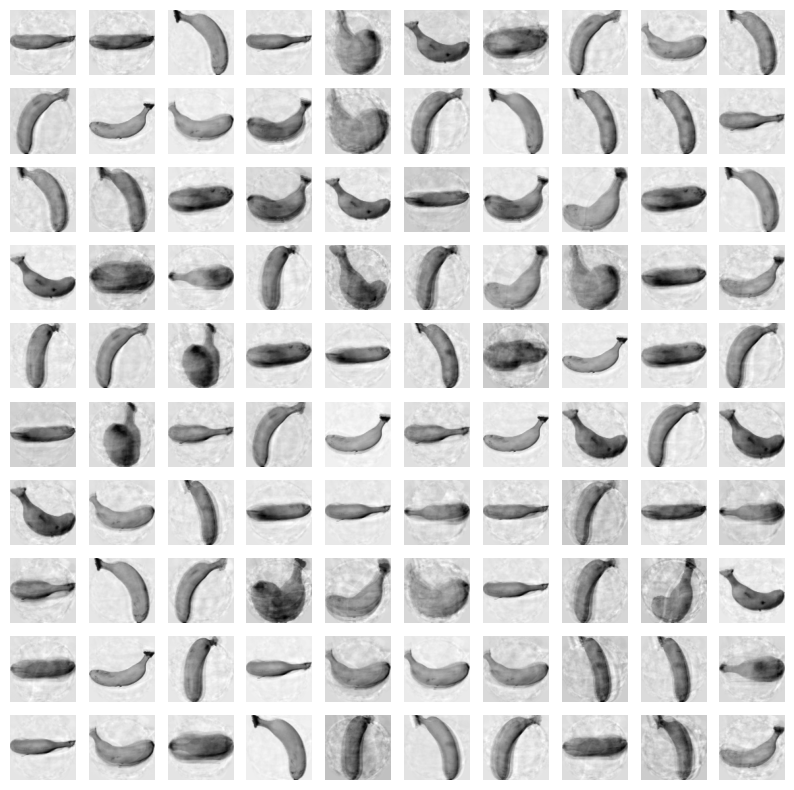

In [ ]:
# 사과, 파인애플, 바나나를 각각 100개씩 출력
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
# pca.explained_variance_ratio_ : 각 주성분이 설명하는 분산의 비율을 저장
# sum()을 활용해 50개의 주성분이 설명하는 분산의 비율의 총합을 계산
print(np.sum(pca.explained_variance_ratio_))
# 50개의 주성분이 보유한 특성 : 원본 데이터의 92% 이상

0.9215039884129173


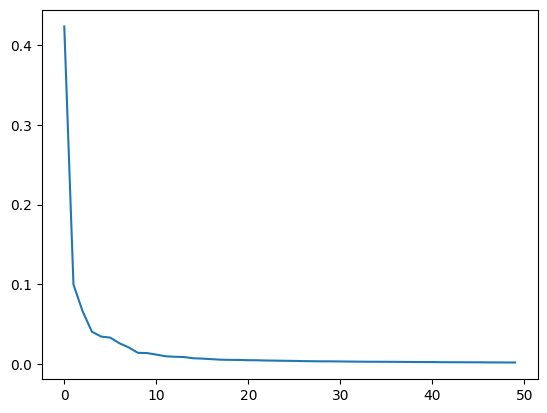

In [ ]:
# pca.explained_variance_ratio_를 시각화
plt.plot(pca.explained_variance_ratio_)
# 그래프상에서 봤을 때, 사실상 10개의 특성 안에서 대부분의 분산이 설명되는 것을 확인함

## 다른 알고리즘과 함께 사용하기

In [ ]:
# LogisticRegression 불러오기
from sklearn.linear_model import LogisticRegression
# LogisticRegression 객체 생성
lr = LogisticRegression()

In [ ]:
# LogisticRegression는 지도학습이기 때문에, target 값을 정해야 함
# 0, 1, 2에 100을 곱해서 각 레이블별로 타겟값을 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# cross_validate 불러오기
from sklearn.model_selection import cross_validate

# 원본데이터 활용해 교차검증 수행
scores = cross_validate(lr, fruits_2d, target)
# 교차검증 점수 출력
print(np.mean(scores['test_score']))
# 학습에 소요된 시간 출력
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9666677951812743


In [ ]:
# pca데이터 활용해 교차검증 수행
scores = cross_validate(lr, fruits_pca, target)
# 교차검증 점수 출력
print(np.mean(scores['test_score']))
# 학습에 소요된 시간 출력
print(np.mean(scores['fit_time']))
# 50개의 특성만으로 교차검증 점수와 훈련시간이 줄어든 것을 확인

1.0
0.03341145515441894


In [ ]:
# pca 객체 생성
# n_components에 사용할 분산의 비율을 입력할 수 있음
# n_components=0.5 : 분산의 50% 특성을 담는 주성분을 추출하겠다는 의미
pca = PCA(n_components=0.5)
# pca 학습
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
# pca.n_components_ : 주성분 개수 저장
print(pca.n_components_)
# 원본 데이터 분산의 50%를 2개의 주성분이 갖고 있음을 알 수 있음

2


In [ ]:
# 주성분을 2개 갖는 모델로 pca 적용
fruits_pca = pca.transform(fruits_2d)
# 데이터 형태 출력
print(fruits_pca.shape)

(300, 2)


In [ ]:
# 주성분 2개인 pca 데이터 활용해 교차검증 수행
scores = cross_validate(lr, fruits_pca, target)
# 교차검증 점수 출력
print(np.mean(scores['test_score']))
# 학습에 소요된 시간 출력
print(np.mean(scores['fit_time']))
# 2개의 주성분만으로 99% 이상의 정확도 달성, 학습 소요시간의 엄청난 감소 확인

0.9933333333333334
0.030165576934814455


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# KMeans 불러오기
from sklearn.cluster import KMeans

# KMeans 객체 생성
# 클러스터 = 3개로 설정
km = KMeans(n_clusters=3, random_state=42)
# KMeans 학습
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# 레이블 0, 1, 2로 군집화된 샘플의 개수 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


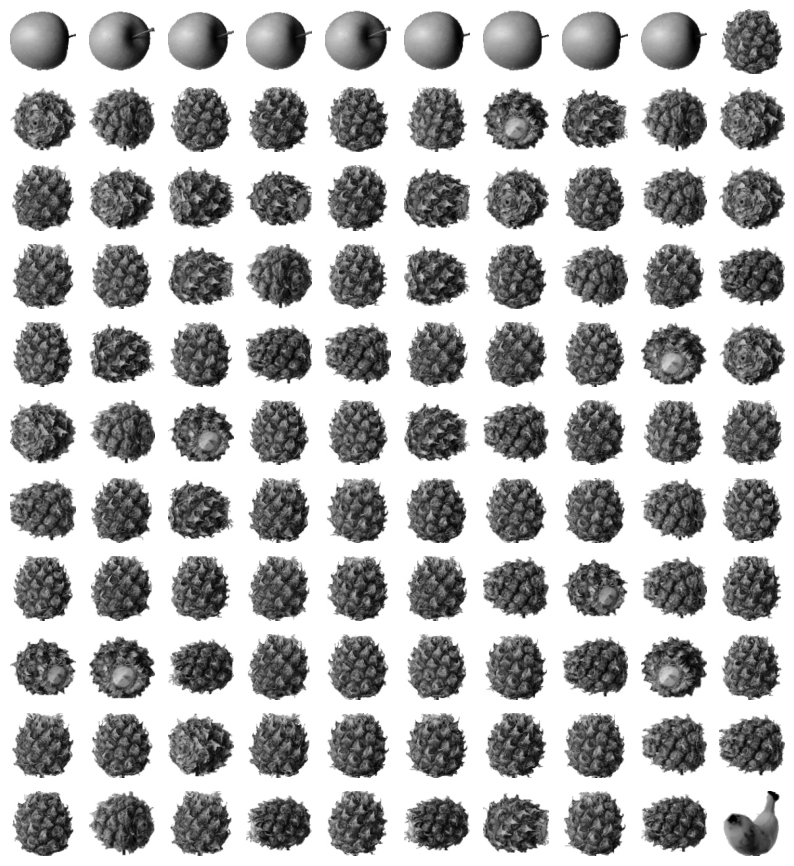

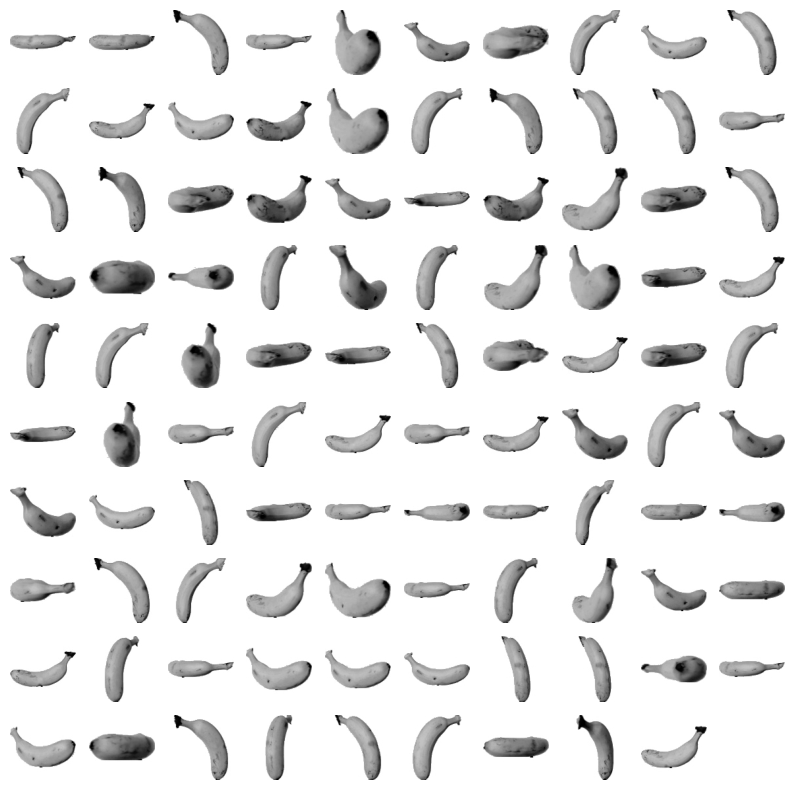

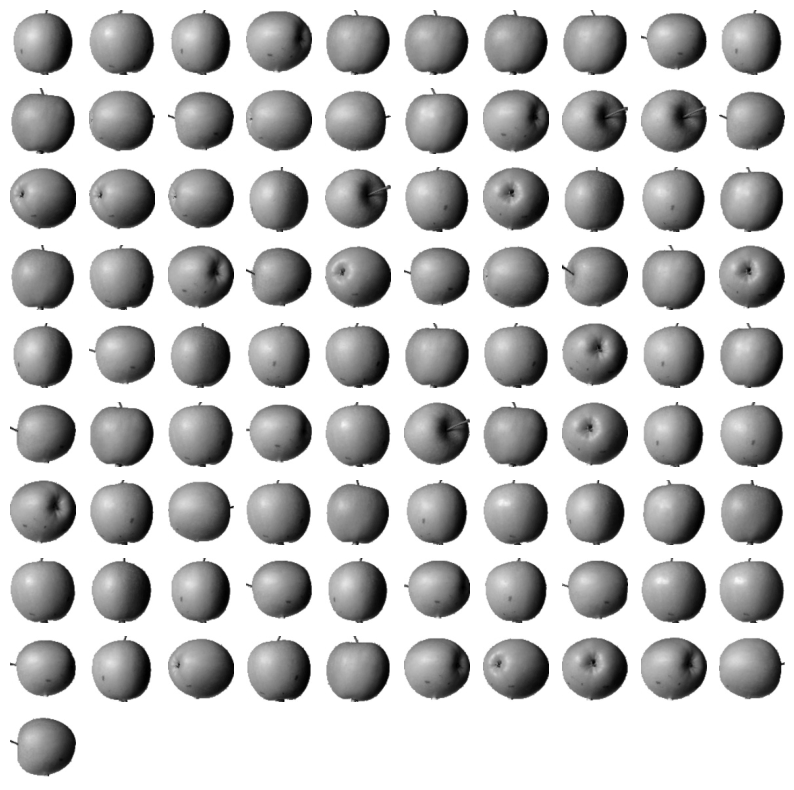

In [ ]:
# k-means가 찾은 레이블을 사용해 과일 이미지 출력
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

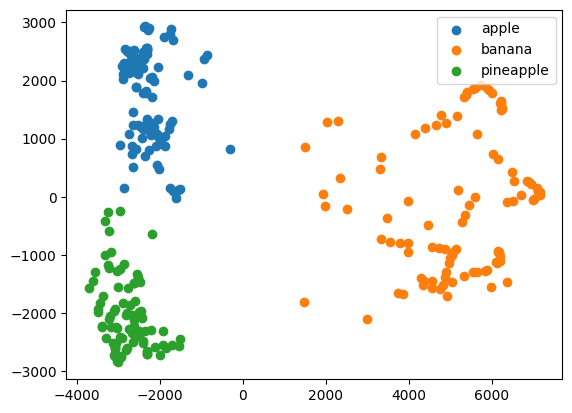

In [ ]:
# pca 적용 데이터를 시각화
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 특징이 뚜렷한 데이터였음을 알 수 있음
# 예상치 못한 통찰 파악 가능
# 모델에서 사과와 파인애플을 혼동했던 이유 : 둘의 분포가 가깝기 때문